# Returning to campus infection risks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
filenamebase = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [6]:
today = date.today()
iday = today.day - 9
ddate = date.today()

states = ['Vermont', 'Maine', 'New Jersey']
n = 0
while iday <= today.day - 1:
#     if (n == 0):
#         incidence_old = incidence.copy()
    ddate = ddate.replace(day = iday)
    filename = filenamebase+ddate.strftime("%m-%d-%Y") + ".csv"
    print(filename)
    df = pd.read_csv(filename)
    df_US_all = df[df['Country_Region'] == 'US']
    df_US = df_US_all[df_US_all['Admin2'] != 'Unassigned']
    incidence = df_US.pivot_table(index = ['Province_State', 'Admin2'], values = 'Incidence_Rate')
#     print(confirmed)
    if (n == 0):
        covid = incidence.copy()
        covid['Incidence_Rate'][:] = 0.
    if (n > 0):
        for ind in covid.index:
            if ind in incidence.index:
                covid['Incidence_Rate'][ind] += incidence['Incidence_Rate'][ind] # - incidence_old['Incidence_Rate'][ind]
    iday += 1
    n += 1
covid['Incidence_Rate'][:] /= n-1
# confirmed["Confirmed"]["Vermont","Orleans"]  

# d1 = today.strftime("%m-%d-%Y")
# print("d1 =", d1)
# # df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-11-2020.csv")
# df_US = df[df['Country_Region'] == 'US']
# df_US

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-04-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-05-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-06-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-07-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-08-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-09-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-10-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [20]:
covid['Returning_Students'] = np.random.randint(0, 400, covid.shape[0])
Total_students = 0
for i in covid.index:
    if i[0] in states:
        print(i,covid['Returning_Students'][i])
        Total_students += covid['Returning_Students'][i]


('Maine', 'Androscoggin') 370
('Maine', 'Aroostook') 244
('Maine', 'Cumberland') 399
('Maine', 'Franklin') 333
('Maine', 'Hancock') 106
('Maine', 'Kennebec') 190
('Maine', 'Knox') 42
('Maine', 'Lincoln') 196
('Maine', 'Oxford') 196
('Maine', 'Penobscot') 311
('Maine', 'Piscataquis') 83
('Maine', 'Sagadahoc') 122
('Maine', 'Somerset') 77
('Maine', 'Waldo') 391
('Maine', 'Washington') 294
('Maine', 'York') 253
('New Jersey', 'Atlantic') 388
('New Jersey', 'Bergen') 119
('New Jersey', 'Burlington') 55
('New Jersey', 'Camden') 166
('New Jersey', 'Cape May') 234
('New Jersey', 'Cumberland') 136
('New Jersey', 'Essex') 117
('New Jersey', 'Gloucester') 356
('New Jersey', 'Hudson') 246
('New Jersey', 'Hunterdon') 350
('New Jersey', 'Mercer') 43
('New Jersey', 'Middlesex') 172
('New Jersey', 'Monmouth') 395
('New Jersey', 'Morris') 126
('New Jersey', 'Ocean') 156
('New Jersey', 'Passaic') 152
('New Jersey', 'Salem') 32
('New Jersey', 'Somerset') 318
('New Jersey', 'Sussex') 293
('New Jersey', '

In [21]:
# Create a distribution 
print(Total_students)

10568


In [22]:
for i in covid.index:
    if i[0] in states:
        print(i,covid['Returning_Students'][i],covid['Incidence_Rate'][i]/10000)

('Maine', 'Androscoggin') 370 516.4993488921932
('Maine', 'Aroostook') 244 49.02691820147641
('Maine', 'Cumberland') 399 705.7979071399275
('Maine', 'Franklin') 333 149.01155667406206
('Maine', 'Hancock') 106 64.78804080964592
('Maine', 'Kennebec') 190 139.20459191182482
('Maine', 'Knox') 42 68.20124710851856
('Maine', 'Lincoln') 196 99.61309695674773
('Maine', 'Oxford') 196 92.92798620094871
('Maine', 'Penobscot') 311 99.57409890369902
('Maine', 'Piscataquis') 83 20.85195114685731
('Maine', 'Sagadahoc') 122 153.39134315037927
('Maine', 'Somerset') 77 65.61484826875844
('Maine', 'Waldo') 391 156.11230013848672
('Maine', 'Washington') 294 39.83555881321904
('Maine', 'York') 253 323.4549053414306
('New Jersey', 'Atlantic') 388 1314.0478628588767
('New Jersey', 'Bergen') 119 2227.7226395137536
('New Jersey', 'Burlington') 55 1344.6196129327786
('New Jersey', 'Camden') 166 1686.4489773353262
('New Jersey', 'Cape May') 234 901.2483838372864
('New Jersey', 'Cumberland') 136 2230.199228233028

In [23]:
covid['Infected_Students'] = round(covid['Returning_Students'] * covid['Incidence_Rate']/10000)

In [24]:
Total_infected = 0
for i in covid.index:
    if i[0] in states:
        Total_infected += covid['Infected_Students'][i]
print(Total_infected)

838.0


## SEIR Model

From https://github.com/jckantor/covid-19

8.0 10568


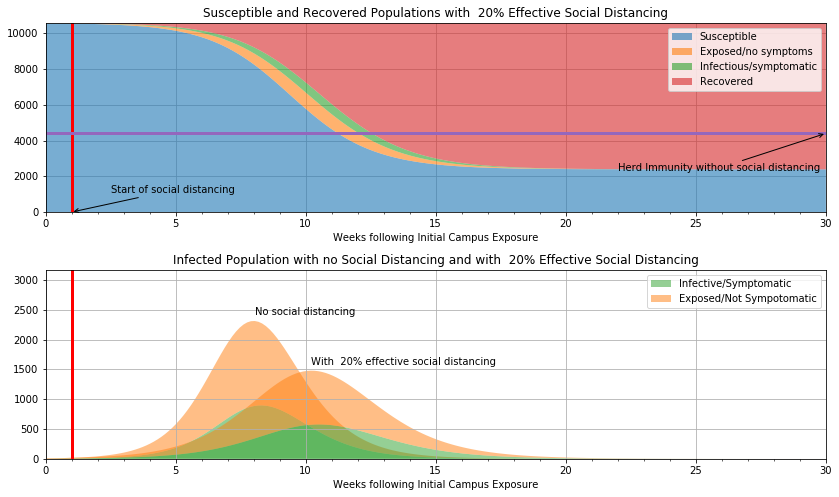

In [33]:
R0 = 2.4 
t_incubation = 5.1
t_infective = 3.3 
N = Total_students 
pct_false_negative = 0.01
n = round(Total_infected * pct_false_negative) 
print(n,N)
t_social_distancing = 1 
u_social_distancing = 20 # % efficacy or social distancing

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# initial number of infected and recovered individuals
e_initial = n/N
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

def step(t):
    return 1 if t >= 7*t_social_distancing else 0

# SEIR model differential equations.
def deriv(x, t, u, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u*step(t)/100)*beta * s * i
    dedt =  (1-u*step(t)/100)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 210, 210)
x_initial = s_initial, e_initial, i_initial, r_initial
s, e, i, r = odeint(deriv, x_initial, t, args=(u_social_distancing, alpha, beta, gamma)).T
s0, e0, i0, r0 = odeint(deriv, x_initial, t, args=(0, alpha, beta, gamma)).T

# plot the data
fig = plt.figure(figsize=(12, 10))
ax = [fig.add_subplot(311, axisbelow=True), 
      fig.add_subplot(312)]

pal = sns.color_palette()

ax[0].stackplot(t/7, N*s, N*e, N*i, N*r, colors=pal, alpha=0.6)
ax[0].set_title('Susceptible and Recovered Populations with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[0].set_xlabel('Weeks following Initial Campus Exposure')
ax[0].set_xlim(0, t[-1]/7)
ax[0].set_ylim(0, N)
ax[0].legend([
    'Susceptible', 
    'Exposed/no symptoms', 
    'Infectious/symptomatic',
    'Recovered'], 
    loc='best')
ax[0].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)
ax[0].plot(np.array([0, t[-1]])/7, [N/R0, N/R0], lw=3, label='herd immunity')
ax[0].annotate("Start of social distancing",
    (t_social_distancing, 0), (t_social_distancing + 1.5, N/10),
    arrowprops=dict(arrowstyle='->'))
ax[0].annotate("Herd Immunity without social distancing",
    (t[-1]/7, N/R0), (t[-1]/7 - 8, N/R0 - N/5),
    arrowprops=dict(arrowstyle='->'))

ax[1].stackplot(t/7, N*i0,N*e0, colors=pal[2:0:-1], alpha=0.5)
ax[1].stackplot(t/7, N*i, N*e, colors=pal[2:0:-1], alpha=0.5)
ax[1].set_title('Infected Population with no Social Distancing and with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[1].set_xlim(0, t[-1]/7)
ax[1].set_ylim(0, max(0.3*N, 1.05*max(N*(e + i))))
ax[1].set_xlabel('Weeks following Initial Campus Exposure')
ax[1].legend([
    'Infective/Symptomatic', 
    'Exposed/Not Sympotomatic'],
    loc='upper right')
ax[1].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)

y0 = N*(e0 + i0)
k0 = np.argmax(y0)
ax[1].annotate("No social distancing", (t[k0]/7, y0[k0] + 100))

y = N*(e + i)
k = np.argmax(y)
ax[1].annotate("With {0:3.0f}% effective social distancing ".format(u_social_distancing), (t[k]/7, y[k] + 100))

for a in ax:
    a.xaxis.set_major_locator(plt.MultipleLocator(5))
    a.xaxis.set_minor_locator(plt.MultipleLocator(1))
    a.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    a.grid(True)

plt.tight_layout()